In [28]:
from tb_log_reader import LogReader
import seaborn as sns

## Read TF logs

In [2]:
! ls tensorboard_logs

jonas_net_3d_lr_0.0001_epochs_100  jonas_net_3d_lr_0.001_epochs_400
jonas_net_3d_lr_0.0001_epochs_50   jonas_net_3d_lr_0.001_epochs_50
jonas_net_3d_lr_0.001_epochs_10


In [3]:
lr = LogReader('tensorboard_logs/jonas_net_3d_lr_0.0001_epochs_100')

In [19]:
train_events = lr.load_run(1, test=False)
# test_events = lr.load_run(0, test=True)

INFO:tensorflow:No path found after tensorboard_logs/jonas_net_3d_lr_0.0001_epochs_100/20190626-215516/train/events.out.tfevents.1561586116.py-notebook0-82212-prod


INFO:tensorflow:No path found after tensorboard_logs/jonas_net_3d_lr_0.0001_epochs_100/20190626-215516/train/events.out.tfevents.1561586116.py-notebook0-82212-prod


In [21]:
lr.get_available_scalars(train_events)

['loss', 'metric']

In [25]:
train_losses = lr.get_df_from_scalar(train_events, 'loss')
train_dices = lr.get_df_from_scalar(train_events, 'metric')
# test_losses = lr.get_df_from_scalar(test_events, 'loss')
# test_dices = lr.get_df_from_scalar(test_events, 'metric')

In [23]:
# fa: why is the train loss at the end of the training still so high, but accuracy is good?
train_losses.iloc[-1]

steps     9.999000e+03
times     1.561642e+09
values    2.508305e-03
Name: 9999, dtype: float64

In [20]:
# backprop
train_losses.iloc[-1]

times     1.555018e+09
steps     9.379000e+03
values    0.000000e+00
Name: 9379, dtype: float64

In [26]:
# backprop
train_dices.head()

,steps,times,values
0,99,1.561587e+09,0.048522
1,199,1.561587e+09,0.083347
2,299,1.561588e+09,0.182952
3,399,1.561588e+09,0.263432
4,499,1.561589e+09,0.516855


In [12]:
test_accuracies

,times,steps,values
0,1.554997e+09,938,80.980003
1,1.554998e+09,1876,87.239998
2,1.554998e+09,2814,87.360001
3,1.554998e+09,3752,91.290001
4,1.554998e+09,4690,90.720001
5,1.554998e+09,5628,89.800003
6,1.554998e+09,6566,92.870003
7,1.554998e+09,7504,90.809998
8,1.554998e+09,8442,92.040001
9,1.554998e+09,9380,93.720001


In [32]:
train_dices.iloc[-1]

steps     9.999000e+03
times     1.561642e+09
values    9.334302e-01
Name: 99, dtype: float64

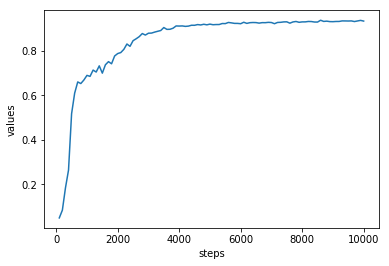

In [29]:
sns.lineplot(x='steps', y='values', data=train_dices)

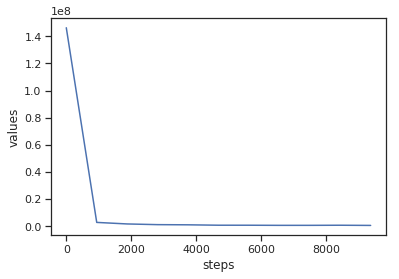

In [12]:
sns.lineplot(x='steps', y='values', data=test_losses)

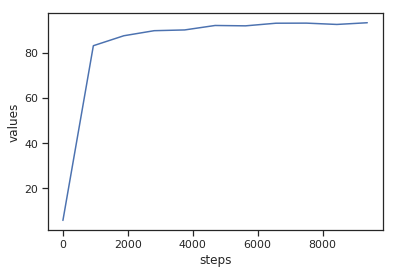

In [13]:
sns.lineplot(x='steps', y='values', data=test_accuracies)

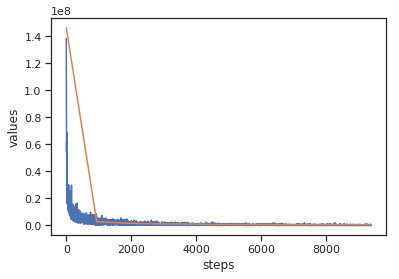

In [15]:
sns.lineplot(x='steps', y='values', data=train_losses)
sns.lineplot(x='steps', y='values', data=test_losses)